<a id='top'></a>

# Homework 5: Confidence intervals and other things
***

**Name**: **Elena Ingraham**

***

This assignment is due on Moodle by **5 PM on Friday July 6**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy.stats as stats
from datetime import datetime
import random
%matplotlib inline

---

<a id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1 - Sea-level rise, schmee-level rise!

You have been contacted by the local government of Key West, Florida, to assess whether there is statistical evidence for sea-level rise in the area. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file [linked here](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm0rl5dp6y4) and below.

In this problem, you will:
1. practice calculating confidence intervals, 
1. practice wrangling a real-life data set into a form where you can actually compute these confidence intervals, because life will rarely be so kind as to simply hand you a nicely packaged and cleaned set of data, and
1. save Key West from a watery fate?

In [ ]:
# Local and web paths to the data; pick which works for you.
local_path = "data/sealevel_keywest.csv"
web_path   = "https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm0rl5dp6y4"
file_path  = web_path

dfSL = pd.read_csv(file_path, header=None)
dfSL.rename(columns={0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'SL'}, inplace=True)
dfSL.head()

**Part A:**  Write a function `clean_data` to:
1. take in a single argument of a raw sea level data frame (e.g., `dfSL` above),
2. compute the fill-value used to replace missing sea level (SL) data (**not** hard-coded!),
3. use the Pandas `DataFrame.dropna` method to remove all missing rows of data, 
4. select only the data point on the second day of each month, and
4. return a cleaned Pandas data frame.

Use your shiny new function to clean the `dfSL` data frame and save the results in a new data frame.

There is a very specific reason to sample only one daily data point per month. We will talk about it later.

In [ ]:
def clean_data(df):
    for index, row in df.iterrows():
        if (row['Year'] <= 1900):
            df.drop(index, inplace = True)
        elif (row['Month'] <= 1 | row['Month'] >= 12):
            df.drop(index, inplace = True)
        elif (row['Day'] != 2):
            df.drop(index, inplace = True)
        elif (row['SL'] <= 0):
            df.drop(index, inplace = True)
            
    # your code goes here!    
    return df

dfClean = clean_data(dfSL)
dfClean.head()

**Part B:**  Plot the cleaned time series of sea levels. Be sure to label your axes, including units. The UHSLC data portal includes a link to the metadata accompanying our data set; if you are not sure about units, that would be a good place to start looking. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

**Bonus challenge (0 points):**  Why did I choose to work with the second day of each month instead of the first?  You may need to look at the original data set to answer this.

In [ ]:
times = pd.to_datetime(dfClean[['Day','Month', 'Year']])
ts = pd.Series(dfClean['SL'].values, index = times)
ts.head()



In [ ]:
#CHANGE TICKS
ts.plot()
ts.plot(xticks=['1920','1930','1940','1950','1960','1970','1980','1990','2000','2010'])
print("       Sea Level Time Series")

**Part C:** Use your cleaned sea levels data frame to create two new Pandas data frames or series:
1. one object to contain the sea levels between (and including) the years 1986 and 1995, and
2. another object to contain the sea levels between (and including) the years 2006 and 2015.

Then, create a single-panel figure that includes density histograms of each decade of sea levels. Be sure to label everything appropriately.

Finally, based on the data in front of you, formulate and state a hypothesis about how the mean sea level in the decade 2006-2015 compares to the mean sea level in the decade 1986-1995.

In [ ]:
dfEarly = pd.DataFrame(dfClean)
#dfEarly.head()
for index, row in dfEarly.iterrows():
        if (row['Year'] not in range(1986,1995)):
            dfEarly.drop(index, inplace = True)
dfEarly.head()

In [ ]:
dfLate = pd.DataFrame(dfClean)
for index, row in dfLate.iterrows():
        if (row['Year'] not in range(2006,2015)):
            dfLate.drop(index, inplace = True)
dfLate.head()

In [ ]:
plt.hist(x = dfEarly['SL'], color = 'red', alpha = .95)
plt.hist(x = dfLate['SL'], color = 'blue', alpha = .35)
print("     Differences in Sea Level")
plt.show()
print("Blue = 1986 - 1995"," ","Red = 2006 - 2015")
#LABELS 

**Based on the histogram of the two subsets of data, I would hypothesize that the mean of the data from 2006-2015 is larger than the mean of the subset of data from 1986 to 1995.**

**Part D:** Compute a 99.9% confidence interval for each of (1) the mean sea level in the 1986-1995 decade ($\mu_{1986-1995}$) and (2) the mean sea level in the 2006-2015 decade ($\mu_{2006-2015}$).  You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

Based on these two confidence intervals, do you think there is sufficient evidence to conclude that there is or is not a significant difference in the mean sea level between 1986-1995 and 2006-2015? Justify your answer. 

In [ ]:
earlyMean =  dfEarly['SL'].mean()
earlyStd = dfEarly['SL'].std()
n_early = len(dfEarly)
lateMean = dfLate['SL'].mean()
lateStd = dfLate['SL'].std()
n_late = len(dfLate)
z_score = stats.norm.ppf(.9995)
print(z_score)
early_low_bound = earlyMean - (z_score*(earlyStd/math.sqrt(n_early)))
print(early_low_bound)
early_upper_bound = earlyMean + (z_score*(earlyStd/math.sqrt(n_early)))
print(early_upper_bound)


In [ ]:
late_low_bound = lateMean - (z_score*(lateStd/math.sqrt(n_late)))
print(late_low_bound)
late_upper_bound = lateMean + (z_score*(earlyStd/math.sqrt(n_late)))
print(late_upper_bound)


**Part E:**  Compute a 99.9% confidence interval for the ***difference in mean sea level*** between the 2006-2015 and the 1986-1995 decades ($\mu_{2006-2015} - \mu_{1986-1995}$. Based on this, make a conclusion regarding your hypothesis from **Part C**, and compare to what your results in **Part D** implied. You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

In [ ]:
upperBound = (lateMean - earlyMean) + (z_score*math.sqrt(((earlyStd*earlyStd)/n_early)+((lateStd*lateStd)/n_late)))
lowerBound = (lateMean - earlyMean) - (z_score*math.sqrt(((earlyStd*earlyStd)/n_early)+((lateStd*lateStd)/n_late)))
print(upperBound, lowerBound)

**Since the Confidence Interval covers 0, we can conclude at the 99.9% confidence level, that there is no significant difference in mean sea levels between the 1986-1995 and 2006-2015 timeframes. **

**Part F:**  The confidence intervals from **Parts D** and **E** were derived using the Central Limit Theorem.  Which assumption of the Central Limit Theorem would likely be violated if we took more than one measurement per month to form our samples, and why?

**If we were to select more than one measurement per month to form our samples the variance could become infinite and the Central Limit Theorum would be violated since the months with naturally higher sea levels would be over represented **

---

<a id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2 - Quality of Red vs White Wine 

**Part A:** Load the data in [`winequalityred.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm1ebc6q6ye) and [`winequalitywhite.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm17x9pu6y9) into Pandas DataFrames.  They are available under Resources on Piazza, and linked here and below.  A description of this dataset can be found on [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The quantity of interest for this problem is the quality of the wine.

Are we justified in using the Central Limit Theorem in our analysis of estimates of the mean and proportions of the data?  Justify your response. 

In [ ]:
# read either local or web file version; pick whichever works for you
local_file_white = "../../data/winequalitywhite.csv"
local_file_red   = "../../data/winequalityred.csv"
web_file_white = "https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm17x9pu6y9"
web_file_red   = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

dfRed   = pd.read_csv(web_file_red, sep = ';')
dfWhite = pd.read_csv(web_file_white, sep = ';')

dfRed.head()

In [ ]:
plt.hist(dfRed['quality'], bins = 6)
print("     Red Wine Distribution")
plt.show()

In [ ]:
plt.hist(dfWhite['quality'], bins = 6)
print("      White Wine Distribution")
plt.show()

**Part B:** Let $X$ be a random variable denoting the quality of a bottle of wine, and let $C$ be a random variable denoting its color (either red ($r$) or white ($w$)). For the remainder of this problem, we are concerned with probabilities such as "If I buy a random bottle of red wine, what is the probability that its quality is at least a 7?". We could write that probability as $P(X \geq 7 \mid C=r)$, for example, and consider it the ***proportion*** of the population of red wines that are at least a 7 in quality. Calculate and report estimates of $P(X \geq 7 \mid C=r)$ and $P(X \geq 7 \mid C=w)$.

Obtain 95% confidence intervals for the proportion of red and white wines that are **at least** a 7 in quality (obtain one CI for each color).  Based on your results, if you are interested in buying many high quality bottles of wine but are buying totally at random, is one color a better bet than the other? Fully justify your answer.

Calculations may be executed in Python, but you need to set up your work (*what* it is you are calculating) in Markdown/MathJax.

In [ ]:
dfRedSucc = pd.DataFrame(dfRed)
dfWhiteSucc = pd.DataFrame(dfWhite)
n_white = len(dfWhite)
n_red = len(dfRed)
print(n_white)
print(n_red)
for index, row in dfRedSucc.iterrows():
        if (row['quality'] < 7):
            dfRedSucc.drop(index, inplace = True)
for index, row in dfWhiteSucc.iterrows():
        if (row['quality'] < 7):
            dfWhiteSucc.drop(index, inplace = True)
print("Proportion of Red Wine Bottles that are at least 7 in quality: ", len(dfRedSucc)/len(dfRed))
print("Proportion of White Wine Bottles that are at least 7 in quality: ", len(dfWhiteSucc)/len(dfWhite))
red_phat = len(dfRedSucc)/len(dfRed)
white_phat = len(dfWhiteSucc)/len(dfWhite)


In [ ]:
z_score_wine = stats.norm.ppf(.975)
red_upper = red_phat + (z_score_wine * math.sqrt((red_phat*(1-red_phat))/n_red))
red_lower = red_phat - (z_score_wine * math.sqrt((red_phat*(1-red_phat))/n_red))
print("Red Wine Confidence Interval:", red_upper, "-", red_lower)
white_upper = white_phat + (z_score_wine * math.sqrt((white_phat*(1-white_phat))/n_white))
white_lower = white_phat - (z_score_wine * math.sqrt((white_phat*(1-white_phat))/n_white))
print("White Wine Confidence Interval:", white_upper, "-",  white_lower)

**Part C:** Now, as college students (and teachers), we might not be super concerned with buying a really high quality bottle of wine.  In fact, you might be confused about what these "bottles" this problem is referring to are... don't we mean "bags"?  But I digress.  Let's focus instead on making sure we do *not* buy a really disgusting bottle of wine.  Calculate and report estimates of $P(X \geq 5 \mid C=r)$ and $P(X \geq 5 \mid C=w)$.

Obtain two 95% confidence intervals, one for the proportion of red wines and one for white wines, that are **at least** a 5 in quality, that is, $P(X \geq 5 \mid C)$.  Based on your results - and what you saw in Problem 1 - if you are interested in buying bottles of wine that are at least a 5 in quality, but are again buying wine totally randomly, can you conclude that you are better off buying one color over the other? Fully justify your answer.

In [ ]:
dfRedSucc1 = pd.DataFrame(dfRed)
dfWhiteSucc1 = pd.DataFrame(dfWhite)
for index, row in dfRedSucc1.iterrows():
        if (row['quality'] < 5):
            dfRedSucc1.drop(index, inplace = True)
for index, row in dfWhiteSucc1.iterrows():
        if (row['quality'] < 5):
            dfWhiteSucc1.drop(index, inplace = True)
red_phat5 = len(dfRedSucc1)/len(dfRed)
print(red_phat5)
white_phat5 = len(dfWhiteSucc1)/len(dfWhite)
red_upper5 = red_phat5 + (z_score_wine * math.sqrt((red_phat5*(1-red_phat5))/n_red))
red_lower5 = red_phat5 - (z_score_wine * math.sqrt((red_phat5*(1-red_phat5))/n_red))
print("Red Wine Confidence Interval:", red_upper5, "-", red_lower5)
white_upper5 = white_phat5 + (z_score_wine * math.sqrt((white_phat5*(1-white_phat5))/n_white))
white_lower5 = white_phat5 - (z_score_wine * math.sqrt((white_phat5*(1-white_phat5))/n_white))
print("White Wine Confidence Interval:", white_upper5, "-",  white_lower5)

**Part D:** Compute a 95% confidence interval for the difference in proportions of red and white wines that are at least a 5 in quality. 

Now, based on your results for this part, can you conclude that you are better off buying one color over the other? Fully justify your answer. How does your work here differ from your work in **Part C**?

In [ ]:
wine_upper = (red_phat5 - white_phat5)+(z_score_wine*(math.sqrt(((red_phat5*(1-red_phat5))/n_red)+((white_phat5*(1-white_phat5))/n_white))))
wine_lower = (red_phat5 - white_phat5)-(z_score_wine*(math.sqrt(((red_phat5*(1-red_phat5))/n_red)+((white_phat5*(1-white_phat5))/n_white))))
print("Upper Bound: ",wine_upper, "Lower Bound: ",wine_lower)

**Since the confidence interval contains 0, we cannot conclude anything about the difference in means between white and red wines. This is because we are saying 0 is a reasonable difference in mean which would suggest the population means are the same. **

**Part E:**  Now, we have many more observations of white wines than red. This certainly contributes to the width of the 95% confidence interval for the proportion of red wines that are at least a 5 in quality, which you should have found in **Part C** to be wider than the corresponding confidence interval for white wines. 

How large would our sample size of red wines need to be in order to guarantee that this 95% confidence interval width is at most 0.01? Note that we are hypothetically adding more samples, so we do not know the precise value of $\hat{p}$.

Basically the problem is asking to make the previous interval computed like so: 

red_upper5 = red_phat5 + (z_score_wine * math.sqrt((red_phat5*(1-red_phat5))/n_red))

red_lower5 = red_phat5 - (z_score_wine * math.sqrt((red_phat5*(1-red_phat5))/n_red))

meet the requirement red_upper5 - red_lower5 < .01

Since we do not know $\hat{p}$ we can use $\hat{p}$ = .5 for maximum variability and solve like so:

.01 = 1.96*(sqrt($\hat{p}$(1-$\hat{p}$))/n) =>

0.00510204082 = (sqrt($\hat{p}$(1-$\hat{p}$))/n)

.00002603082 = ($\hat{p}$(1-$\hat{p}$))/n =>

.00002603082n =$\hat{p}$(1-$\hat{p}$) =>

.00002603082n = .25


**The sample size, n must be greater than or equal to 9604 for the width of the confidence interval to be less than .01**

---

<a id='p3'></a>
[Back to top](#top)

### [15 points] Problem 3:  Are you tired of re-doing the same confidence intervals calculation over and over again? Then this is the problem for you!

Turns out, the mechanics of computing confidence intervals are fairly formulaic, once you get the hang of it.  If you have done the first two problems, I would say with 99% confidence that you are tired of copy-pasting code and putting in new data frames and numbers. So let's develop some flexible, generic software to do this for us. Yay computers!

In order to test drive our software, we will use the [weather data set](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jhzhwu02pxq4eq) from the in-class notebooks back in the beginning of the semester (and linked here).  Execute the code cell below to load the data, print out the valid site names, and view the first few lines, including the column headers.

In [ ]:
# Two different paths to the data 
local_path = 'data/clean_boulder_weather.csv'
web_path   = 'https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jhzhwu02pxq4eq'

# Select the path that works for you 
file_path = web_path 

# View the site names
#print("Site names are:",set(df["NAME"]))

# Load the data into a DataFrame 
df = pd.read_csv(file_path)
df.head()

**Your task:** Write a function called `ci_mean` with the following specifications.  You are **NOT** allowed to use this function for Problems 1 and 2, but are encouraged to use it to check your answers. You may use this function for Problem 4.

**Code Specifications:**

Arguments:
* `x` -- A list, numpy array, or Pandas DataSeries ("array-like object") that constitutes the data we want a confidence interval for the mean of its population, $\mu_x$.
* `y` -- An optional argument with a default of `None`. Also an array-like object. If `y` is specified, then the function should return a confidence interval for the difference in means, $\mu_x - \mu_y$.
* `sx` -- An optional argument with a default of `None`. If specified, `sx` is the true known standard deviation of the population of `x`.
* `sy` -- An optional argument with a default of `None`. If specified, `sy` is the true known standard deviation of the population of `y`. If `sy` is specified but `y` is not, your code should proceed with computing a confidence interval for the mean of the `x` population only.
* `alp` -- Tail area for the confidence interval (i.e., you want to calculate a $100(1-\textrm{alp})\%$ confidence interval). Should have a default value of $0.05$.

Output:
* `CI` -- A tuple giving the lower and upper confidence bounds for the $100(1-\textrm{alp})\%$ confidence interval.

Required Output: show us output for the following
* For NIWOT, CO US, use your `ci_mean` function to construct a 90% confidence interval for the mean July 2017 maximum temperatures, $\mu_{niwot}$.
* For BOULDER 14 W, CO US, use your `ci_mean` function to construct a 90% confidence interval for the mean July 2017 maximum temperatures, $\mu_{boulder14}$. Based on your answers so far, can you conclude anything at the 90% confidence level about any differences in mean July 2017 daily maximum temperature in Niwot and Boulder 14 W?
* Use your `ci_mean` function to compute a 90% confidence interval for the difference in mean July 2017 daily maximum temperature between NIWOT and BOULDER 14 W, $\mu_{niwot} - \mu_{boulder14}$. Can you conclude anything, at the 90% confidence level, about the difference in mean daily maximum temperature in July for the two sites?

Unit Tests: not required, but encouraged
* Check your answers to Problems 1 and 2.
* Check your answers for the Required Output by hand.
* Crowd-source some unit tests:  Check your answers for other combinations of the weather data sites and confidence levels with your peers on Piazza!
* There is sizable probability that we will use other test cases to grade your code, including possibly other problems from this homework, and other sets of data. So your code must **not** be hard-coded to expect input from the weather data set.

In [27]:
dfBoulder = pd.DataFrame(df)
for index, row in dfBoulder.iterrows():
        if (row['NAME'] != "BOULDER 14 W, CO US"):
            dfBoulder.drop(index, inplace = True)
dfBoulder.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USW00094075,"BOULDER 14 W, CO US",2017-07-01,0.00,68.0,31.0
1,USW00094075,"BOULDER 14 W, CO US",2017-07-02,0.00,73.0,35.0
2,USW00094075,"BOULDER 14 W, CO US",2017-07-03,0.00,68.0,46.0
3,USW00094075,"BOULDER 14 W, CO US",2017-07-04,0.05,68.0,43.0
4,USW00094075,"BOULDER 14 W, CO US",2017-07-05,0.01,73.0,40.0


In [28]:
dfNiwot = pd.DataFrame(df)
for index, row in dfNiwot.iterrows():
        if (row['NAME'] != "NIWOT, CO US"):
            dfNiwot.drop(index, inplace = True)
dfNiwot.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
93,USS0005J42S,"NIWOT, CO US",2017-07-01,0.0,69.0,32.0
94,USS0005J42S,"NIWOT, CO US",2017-07-02,0.0,73.0,37.0
95,USS0005J42S,"NIWOT, CO US",2017-07-03,0.0,68.0,47.0
96,USS0005J42S,"NIWOT, CO US",2017-07-04,0.1,70.0,41.0
97,USS0005J42S,"NIWOT, CO US",2017-07-05,0.0,74.0,40.0


In [29]:
def ci_mean(x,y = None, sx = None, sy = None, alp = .05):
    upper_bound = 0 
    lower_bound = 0
    inner = 0
    innery = 0
    n = len(x)
    x_mean = x.mean()
    #print(x_mean)
    zcrit = 1-(alp/2)
    z_score = stats.norm.ppf(zcrit)
   # print(z_score)
    if(sx is None):
        sx = x.std()
    inner = sx/n
   # print(sx)
    var = math.sqrt(inner)
    if(y is None):
        upper_bound = (x_mean) + (z_score * (var))
        lower_bound = (x_mean) - (z_score * (var))
    elif(y is not None):
        n2 = len(y)
        if(sy is None):
            sy = y.std()
            inner = sy/n
        upper_bound = (x.mean()-y.mean())+z_score*(math.sqrt((sx*sx)/n)+((sy*sy)/n2))
        lower_bound = (x.mean()-y.mean())-z_score*(math.sqrt((sx*sx)/n)+((sy*sy)/n2))
    return (upper_bound, lower_bound)
niwot = ci_mean(dfNiwot['TMAX'],None, None,None, .1)
print("Niwot confidence interval: ", niwot)
boulder = ci_mean(dfBoulder['TMAX'],None, None,None, .1)
print("Boulder confidence interval: ", boulder)
diff_nibo = ci_mean(dfBoulder['TMAX'], dfNiwot['TMAX'], None,None,.1)
print("Mean difference Niwot and Boulder Confidence interval: ", diff_nibo)

Niwot confidence interval:  (70.539180976297601, 69.138238378541118)
Boulder confidence interval:  (69.49335558030721, 68.119547645499253)
Mean difference Niwot and Boulder Confidence interval:  (2.2419235170777663, -4.3064396461100225)


---

<a id='p4'></a>
[Back to top](#top)

### [30 points] Problem 4 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 1,000 realizations from the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  Be sure to leave this cell executed before turning in your assignment!

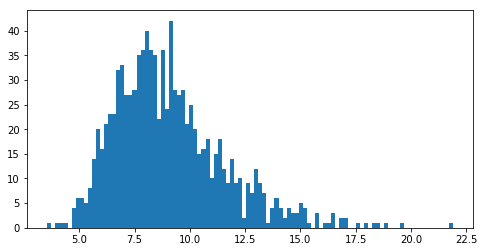

In [30]:
mu = 8
beta = 2
n_sample = 1000
x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)
plt.hist(x = x, bins = 100)
plt.show()
# your code goes here!s.rumbel


**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.  Feel free to use your code from **Problem 3** here!

In [31]:
mean = 8+(np.euler_gamma*2)
var1 = (2*math.pi)/math.sqrt(6)
print('Mean: ', mean)
print('Variance: ', var1)
ci_mean(x,None,var1,None, .05)

Mean:  9.154431329803066
Variance:  2.565099660323728


(9.1576715477584276, 8.9591396891955259)

In [32]:
ci_mean(x, None,None,None, .05)

(9.1566138042100444, 8.9601974327439091)

**Part C:  A theoretical interlude.** When I ran my solution code for **Part B**, I obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** There is a 95% probability that any given random variable sampled from $Gum(\mu=8, \beta=2)$ will be between 8.81 and 9.82.

i). This is an **incorrect** statement because the population mean is one unknown value. If you repeated the experiment, that value wouldn't change. Therefore it isn't strictly correct to ask about the probability that the population mean lies within a certain range. However, it is correct to state that within the confidence level the interval contains the population mean.  

ii). This is a **correct** statement.Since the confidence interval should be different from each student and they are all computing them with 95% confidence, we would expect 95%  of them to contain the true mean.


iii). This statement is **incorrect**. The target value, which serves as the parameter for which we are finding the confidence value, is the mean. This means the 95% confidence interval is with regards to the mean, and not any data point in the sample. 

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 95% confidence interval for the mean.  Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

Proportion that contain true mean:  0.774
          50 Sampled Confidence Intervals


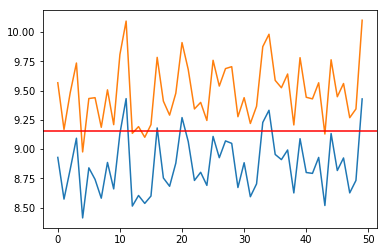

            Red Line Represents True Mean


In [45]:
var1 = (2*math.pi)/math.sqrt(6)
def confidence_intervals(m=500, n=100):
    mu = 8
    beta = 2
    mean = 8+(np.euler_gamma*2)
    var1 = (2*math.pi)/math.sqrt(6)
    prop = 0
    ends = []
    for i in range(m): 
        x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n)
        means = ci_mean(x,None,None,None, .05)
        ends.append(means)
    for i in range(len(ends)): 
        high,low = ends[i]
        if low <= mean <= high:
            prop += 1
    print("Proportion that contain true mean: ", (prop/len(ends)))
    return ends
plts = confidence_intervals(500, 100)
choices = []
highs = []
lows = []
for i in range(50):
    choices.append(random.choice(plts))
for i in range(len(choices)): 
        high,low = choices[i]
        highs.append(high)
        lows.append(low)
plt.plot(range(50), lows)
plt.plot(range(50), highs)
plt.axhline(y=(8+(np.euler_gamma*2)), color='r', linestyle='-')
print("          50 Sampled Confidence Intervals")
plt.show()
print("            Red Line Represents True Mean")

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 


**It is close but not quite, this is most likely because we are sampling the Gumbel distribution which is skewed. And since we are only taking samples of 100 we are not working with a lot of data which can explain this discrepency.**

**Part F**: In general, which is wider: a 95% confidence interval or a 99% confidence interval? Now, ELIF.  That is, *Explain it Like I'm Five*.

**In general a 99% confidence interval is wider that a 95% confidence interval because the interval gives us a range where we may expect to see the population mean. In order to have a higher confidence we must increase the width of the range. For example if I were to guess someone's weight and wanted to be sure I give a correct range, I would guess between 0-10,000 lbs because there is no way they could exist outside that range. In a range with a lower confidence I could guess 150-200 lbs. ** 

---
[Back to top](#top)